## Zero-order methods

#### Problem:
$$
f(\vec{x}) \rightarrow min,\\
f: \Omega \rightarrow \mathbb{R}, \\
\vec{x_*} \in \Omega, f_{min} = f(\vec{x_*})
$$

In zero-order methods we use only information about function value in point. Many of these methods are not theoretically justified and are built heoristicly. So questions about convergences are comonly absent. But they are in connection with first- and second-order methods, so the way to measure efficiency is comparsion.

#### Features of the zero-order methods

Let's describe a simple algorithm of zero-order method. Let us have $f: \mathbb{R}^n \rightarrow \mathbb{R}$. We pick point $\vec{x}_0$ which is called *base*. Than we evaluate $f(\vec{x}_0)$ and build n-dimension cube with length $l$ and center in this point. Set of edges of this cube is named *pattern*. We evaluate function in all points from pattern and then we pick the minimum and the procedure continiues with some reduction of length $l$.

The drawback of this method is obvious. Our points can repeat, to avoid this, we can use *simplexes*. ***Simplex*** is an $n+1$-dimensional convex polytope.

**Regular simplex** is a simplex with all equaldistant edges. J. Nelder and R. Meald first introduced *irregular simplexes*, which are basis of *Controlled direct search* or *Nelder-Mead algorithm*

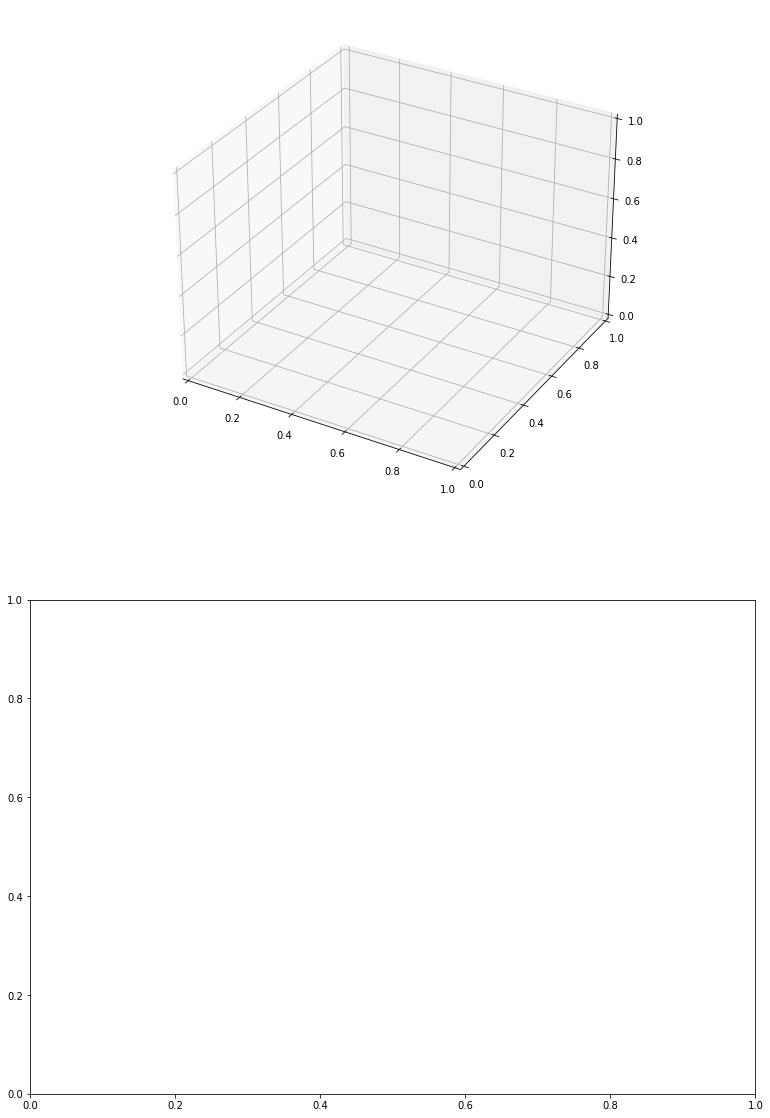

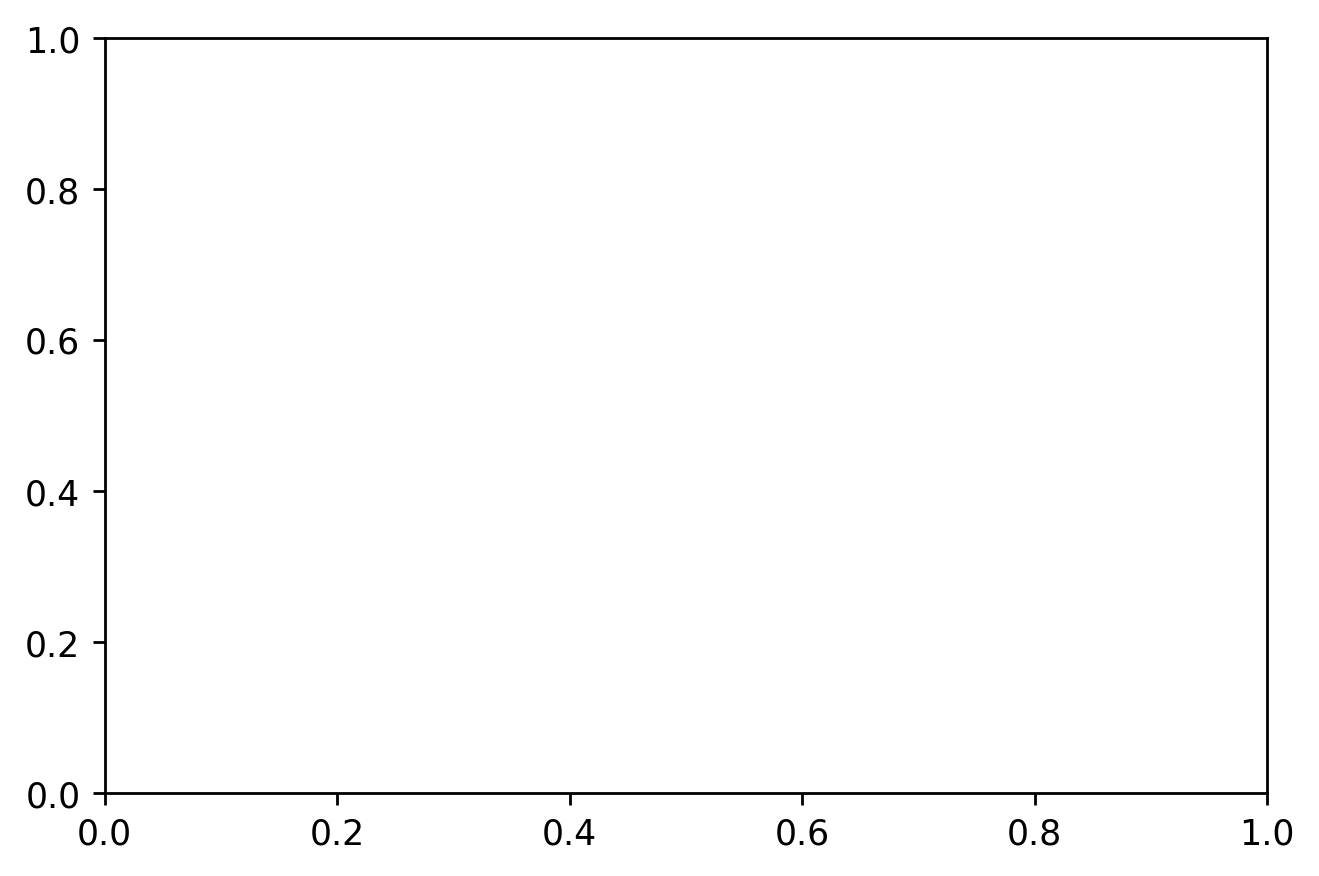

In [1]:
import numpy as np
from numpy.linalg import norm
import matplotlib.animation as pltanimation
from test_functions import *
from animations import AnimateSimplex

def optimization_result(title, fmin, xmin, K, f_ev, res=None):
    print(f"""
{title}
Optimization {res}
x minimum: {xmin},
f minimum: {fmin},
number of iterations: {K},
number of function evaluations: {f_ev},
""") if res == 'succes' else print(f"""{title}\nOptimization {res}""")

### Nelder-Mead Algorithm

Let $S_k \subset \mathbb{R^n}$ is true simplex. The procedure of finding next simplex, in wich function has less value consists of several stages: **reflection** of $\vec{x}_{l,n+1}$, **transforming** size and form of simplex if search step is sucessful or simplex **reduction** if not.

Vertex reflection of $\vec{x}_{k+1,n+1}$ using this formula:
$$
\vec{x}_{k+1,n+1} = \frac{1+\alpha}{n}\sum^n_{i=1}\vec{x}_{k,i} - \alpha \vec{x}_{k,n+1}
$$
Where $\alpha$ is a reflection coefficient. $\sum^n_{i=1}\vec{x}_{k,i}$ - center of edge

If in new vertex the value of function is less, we have success and there goes the procedure of scaling size and form of simplex $S_{k+1}$. 

If $f(\vec{x}_{k,n}) \geq f(\vec{x}_{k+1,n+1}) \geq \vec{x}_{k,1}$ we get next simplex $S_{k+1}$ with new vertex $\vec{x}_{k+1,n+1}$ and n vertexes $\vec{x}_{k,i} \in S_k$ 

If $f(\vec{x}_{k+1,n+1}) > f(\vec{x}_{k,n}) \geq \vec{x}_{k,1}$ we compress the simplex.

If $\vec{x}_{k,1} > f(\vec{x}_{k+1,n+1})$ we stretch the simplex using the formula:
$$
f(\vec{x^*}_{k+1,n+1}) = \frac{1 - \beta}{n}\sum^n_{i=1}\vec{x}_{k,i} + \beta\vec{x}_{k+1,n+1}
$$

Where $\beta > 1$ - coefficient.

After the stretch if $f(\vec{x^*}_{k+1,n+1}) < \vec{x}_{k,1}$  

In [2]:
# def plot_contour(f, fig, ax, xy_range=[-10, 10], step=0.1, cmap=cm.gist_ncar, quality=100, bar=True):
#     X = np.arange(*xy_range, step)
#     Y = np.arange(*xy_range, step)
#     X, Y = np.meshgrid(X, Y)
#     get_f = lambda i: (f(np.array([X[i, j], Y[i, j]])) for j in range(X.shape[1]))
#     a = np.fromiter(chain.from_iterable(get_f(i) for i in range(X.shape[0])), float, X.shape[0]*X.shape[1])
#     Z = a.reshape(X.shape)
#     plot = ax.contourf(X, Y, Z, np.linspace(Z.min(), Z.max(), 10000), cmap=cmap)
#     if bar:
#         fig.colorbar(plot, ax=ax, shrink=0.5, aspect=5)
#     return fig

# def draw_simplex(points, fig, ax):
#     [x1, x2, x3] = points
#     point1 = ax.scatter(x1[0], x1[1], color='r', s=3, marker='s')
#     point2 = ax.scatter(x2[0], x2[1], color='r', s=3, marker='s')
#     point3 = ax.scatter(x3[0], x3[1], color='r', s=3, marker='s')
#     line1 = ax.plot([x1[0], x2[0]], [x1[1], x2[1]], color='r', linewidth=0.7)
#     line2 = ax.plot([x2[0], x3[0]], [x2[1], x3[1]], color='r', linewidth=0.7)
#     line3 = ax.plot([x3[0], x1[0]], [x3[1], x1[1]], color='r', linewidth=0.7)
#     return fig, ax

# class AnimateSimplex:
#     anms = None 
#     fig, ax = plt.subplots(dpi=250)
#     counter = 0
#     frames = 0
    
#     def __init__(self, f, points, xy_range):
#         self.f = f
#         self.data = np.array([points])
#         self.contour = plot_contour(f, fig=self.fig, ax=self.ax, xy_range=xy_range, cmap=cm.turbo)
#         self.simplex = draw_simplex(points, self.fig, self.ax)
        
#     def length(self):
#         return len(self.data)
    
#     def add(self, points):
#         self.data = np.vstack([self.data, [points]])
            
    
#     def frame(self, i):
#         self.ax.set_xlabel(f"Iteration:{i}")
#         points = self.data[i]
#         self.fig, self.ax = draw_simplex(points, self.fig, self.ax)
#         if i == self.frames - 1:
#             print("Animation created succesfully")
    
#     def get_animation(self):
#         self.frames = 100 if self.length() > 100 else self.length()
#         return pltanimation.FuncAnimation(self.fig, self.frame, frames=self.frames, interval=200, repeat=True)


In [3]:
test_sqrt1 = [
    danilov,
    np.array([-2, 2]),
    0.001,
    'Square root func 1 test. Starting point (-2, 2)' 
]

test_sqrt2 = [
    danilov,
    np.array([4, 3]),
    0.001,
    'Square root func 1 test. Starting point (4, 3)' 
]

test_rosen1 = [
    rosenbrok,
    np.array([-2, -1]),
    1e-4,
    'Rosenbrock1 test. Starting point (-2, -1)'
]

test_rosen2 = [
    rosenbrok,
    np.array([-3, 4]),
    1e-4,
    'Rosenbrock2 test. Starting point (-3, 4)'
]

test_rosen3 = [
    rosenbrok,
    np.array([3, 3]),
    1e-4,
    'Rosenbrock3 test. Starting point (3, 3)'
]


test_himmel1 = [
    himmelblau,
    np.array([0, -4]),
    1e-4,
    'Himmelblau1 test. Starting point (0, -4)'
]

test_himmel2 = [
    himmelblau,
    np.array([10, 21]),
    1e-4,
    'Himmelblau1 test. Starting point (10, 21)'
]

test_himmel3 = [
    himmelblau,
    np.array([-5, 17]),
    1e-4,
    'Himmelblau1 test. Starting point (-5, 17)'
]



In [4]:
from operator import itemgetter

class Simplex:
    def __init__(self, vertexes, f):
        self.f = f
        self.V = sorted(
            [(v, f(v)) for v in vertexes], 
            key=itemgetter(1)
        )
        self.n = len(vertexes) - 1
        
    def get_points(self):
        return [v[0] for v in self.V]
    
    def insert(self, xnew, f_new, i):
        self.V = [self.V[k] if k != i else (xnew, f_new) for k in range(len(self.V))]
    
    def min(self):
        return self.V[0]
    
    def max(self):
        return self.V[self.n]
    
    def max2(self):
        return self.V[self.n-1]
    
    def sort(self):
        self.V = sorted(self.V, key=itemgetter(1))
    
    def reflect(self, x, alpha):
        vs =  [v for v, f_v in self.V if (v != x).any()]
        new_x = np.divide(1 + alpha, self.n) * sum(vs) - alpha*x
        return new_x, self.f(new_x)
    
    def scale(self, x, beta):
        vs = [v for v, f_v in self.V if (v != x).any()]
        new_x = np.divide(1 - beta, self.n) * np.sum(vs) + beta*x
        return new_x, self.f(new_x)
    
    def reduction(self, delta):
        vertexes = [v for v, f_v in self.V]
        vertexes = [vertexes[0] + delta*(vertexes[i] - vertexes[0]) for i in range (1, self.n+1)]
        self.V = [self.V[0]] + [(v, self.f(v)) for v in vertexes]
    
    def stop_check(self, epsilon):
        for i in range(self.n+1):
            a, b = 0, 0
            if i == self.n:
                a, b = self.V[i][0], self.V[0][0]
            else:
                a, b = self.V[i][0], self.V[i+1][0]
            if norm(a - b) > epsilon:
                return False
        return True
    
    def print(self):
        print("Points:", *[v for v, f_v in self.V], "Func vals:", *[f_v for v, f_v in self.V])

def first_vs(base, l):
    n = len(base)
    return [base] + [base + l*np.eye(n)[i] for i in range(0, n)]
    
def nelder_mead(f, x0, epsilon, title, l=1, alpha=1, beta=2, gamma=0.5, delta=0.5):
    try:
        vs = first_vs(x0, l)
        smplx = Simplex(vs, f)
        anim = AnimateSimplex(f, vs, title)
    #     smplx.print()
        n = len(x0)
        k = 1
        f_ev = n + 1
        while not smplx.stop_check(epsilon):
            xm, fm = smplx.min()
            xh, fh = smplx.max() 
            xg, fg = smplx.max2()
            new_x, new_f = smplx.reflect(xh, alpha)
            f_ev += 1
            if new_f < fm:
                str_x, str_f = smplx.scale(new_x, beta)
                f_ev += 1
                if str_f < new_f:
                    smplx.insert(str_x, str_f, smplx.n)
                else:
                    smplx.insert(new_x, new_f, smplx.n)
            elif new_f < fg:
                smplx.insert(new_x, new_f, smplx.n)
            elif new_f < fh:
                smplx.insert(new_x, new_f, smplx.n)
                com_x, com_f = smplx.scale(new_x, gamma)
                f_ev += 1
                if com_f < new_f:
                    smplx.insert(com_x, com_f, smplx.n)
                else: 
                    smplx.reduction(delta)
                    f_ev += n
            else:
                com_x, com_f = smplx.scale(xh, gamma)
                if com_f < fh:
                    smplx.insert(com_x, com_f, smplx.n)
                else: 
                    smplx.reduction(delta)
                    f_ev += n

            smplx.sort()
            k += 1
            anim.add(smplx.get_points())
    #         smplx.print()
            if k == 30000:
                return *smplx.min(), k, f_ev, anim, 'fail'
        return *smplx.min(), k, f_ev, anim, 'succes'
    except:
        return *smplx.min(), k, f_ev, anim, 'fail'




In [24]:
fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_sqrt1, l=1)
optimization_result(test_sqrt1[3], fmin, xmin, K, f_ev, res=res)
# a = anim.get_animation(duration=10000).save('examples/Sqrt/Sqrt1-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_sqrt2, l=1)
optimization_result(test_sqrt2[3], fmin, xmin, K, f_ev, res=res)
# a = anim.get_animation(duration=5000).save('examples/Sqrt/Sqrt2-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_rosen1, l=1.5)
optimization_result(test_rosen1[3], fmin, xmin, K, f_ev, res=res)
a = anim.get_animation(duration=8000).save('examples/Rosenbrock/Rosenbrock1-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_rosen2, l=1)
optimization_result(test_rosen2[3], fmin, xmin, K, f_ev, res=res)
a = anim.get_animation(duration=10000).save('examples/Rosenbrock/Rosenbrock2-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_rosen3, l=1.5)
optimization_result(test_rosen3[3], fmin, xmin, K, f_ev, res=res)
# a = anim.get_animation(duration=8000).save('examples/Rosenbrock/Rosenbrock3-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_himmel1, l=1)
optimization_result(test_himmel1[3], fmin, xmin, K, f_ev, res=res)
a = anim.get_animation(duration=8000).save('examples/Himmelblau/Himmel1-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_himmel2, l=1)
optimization_result(test_himmel2[3], fmin, xmin, K, f_ev, res=res)
a = anim.get_animation(duration=8000).save('examples/Himmelblau/Himmel2-Nelder-Mead.gif')

fmin, xmin, K, f_ev, anim, res = nelder_mead(*test_himmel3, l=1)
optimization_result(test_himmel3[3], fmin, xmin, K, f_ev, res=res)
a = anim.get_animation(duration=8000).save('examples/Himmelblau/Himmel3-Nelder-Mead.gif')


Square root func 1 test. Starting point (-2, 2)
Optimization succes
x minimum: 3.3166274186574904,
f minimum: [-0.30175781 -0.60449219],
number of iterations: 34,
number of function evaluations: 73,


Square root func 1 test. Starting point (4, 3)
Optimization succes
x minimum: 3.3166292417688954,
f minimum: [-0.30322266 -0.60327148],
number of iterations: 42,
number of function evaluations: 93,


Rosenbrock1 test. Starting point (-2, -1)
Optimization succes
x minimum: 2.632997514619033e-09,
f minimum: [1.00003433 1.00007248],
number of iterations: 5044,
number of function evaluations: 8982,


Rosenbrock2 test. Starting point (-3, 4)
Optimization succes
x minimum: 0.00010466265782127303,
f minimum: [1.01021957 1.02049637],
number of iterations: 1986,
number of function evaluations: 3648,

Rosenbrock3 test. Starting point (3, 3)
Optimization fail

Himmelblau1 test. Starting point (0, -4)
Optimization succes
x minimum: 2.1488858262252997e-08,
f minimum: [ 3.58441162 -1.84814453],
number